**`DROPOUT:--- Dropout is the technique by which we can overcome overfitting of ANN by randomely dropping the neurons in each and every epoch. In Keras we are actually applying dropout with respect to layers where this layers can be callled as dropout layer. by using dropout layer we are randomly dropping neurons in percentage.`**

**`What is ReLU?`**

* ReLU, short for Rectified Linear Unit, is a popular non-linear activation function widely used in artificial neural networks, particularly in deep learning models. It introduces non-linearity into the network, allowing it to learn complex patterns and relationships in the data that linear models cannot capture.

**`How ReLU Works:`**

* The ReLU function operates in a simple way:

* If the input value (x) is positive, the output is simply the input value itself (x).
* If the input value is negative, the output is zero (0).
* Mathematically, it can be expressed as:

* f(x) = max(0, x)

**`Benefits of Using ReLU:`**

* Computational Efficiency: Compared to other activation functions like sigmoid and tanh, ReLU is computationally faster as it only involves a simple comparison operation.
* Vanishing Gradient Problem: ReLU helps alleviate the vanishing gradient problem, which can hinder training in deep neural networks. By having gradients that are not always very small, ReLU allows the network to learn more effectively.
* Sparse Activations: ReLU tends to produce sparse activations, meaning many neurons may output zero. This sparsity can be beneficial for some types of models and learning algorithms.

**`When to Use ReLU:`**

* ReLU is a good default choice for activation functions in many deep learning applications, especially for hidden layers. 

* Here are some scenarios where ReLU is commonly used:

* Image recognition (e.g., convolutional neural networks)
* Natural language processing (e.g., recurrent neural networks)
* Recommendation systems

    **`Things to Consider:`**

* While ReLU offers advantages, it can also lead to a phenomenon called "dying ReLUs," where neurons become permanently inactive if they receive negative inputs for a long time. Techniques like Leaky ReLU can help address this issue.
* ReLU outputs are not zero-centered, which may affect the learning process in some cases. Batch normalization can be used to mitigate this effect.
* In summary, ReLU is a powerful and efficient activation function that plays a crucial role in deep learning models. Its simplicity and ability to address vanishing gradients make it a popular choice for various neural network architectures.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification

import tensorflow
import keras
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import SGD
#Droput--for dropout layer

In [9]:
X, y, = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=2, random_state=1)

<Axes: >

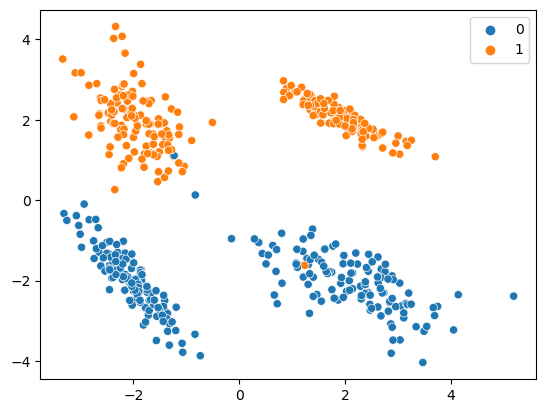

In [10]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

**Splitting the data into train test and validation**

In [11]:
#First splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

#Second splitting into test validation
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)


**Logical Structure**

In [12]:
model = Sequential()

model.add(InputLayer(shape=(2,)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling**

In [14]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

**Training**

In [18]:
history = model.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9950 - loss: 0.1979 - val_accuracy: 0.9778 - val_loss: 0.2416
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9950 - loss: 0.1935 - val_accuracy: 0.9778 - val_loss: 0.2375
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9950 - loss: 0.1890 - val_accuracy: 0.9778 - val_loss: 0.2337
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9950 - loss: 0.1845 - val_accuracy: 0.9778 - val_loss: 0.2293
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9950 - loss: 0.1797 - val_accuracy: 0.9778 - val_loss: 0.2250
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9950 - loss: 0.1759 - val_accuracy: 0.9778 - val_loss: 0.2210
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9950 - loss: 0.1723 - val_accuracy: 0.9778 - val_loss: 0.2177
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9950 - loss: 0.1687 - val_accuracy: 0.9778 - val_loss

Epoch 52/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9950 - loss: 0.0696 - val_accuracy: 0.9778 - val_loss: 0.1292
Epoch 53/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9950 - loss: 0.0687 - val_accuracy: 0.9778 - val_loss: 0.1285
Epoch 54/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9950 - loss: 0.0678 - val_accuracy: 0.9778 - val_loss: 0.1278
Epoch 55/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9950 - loss: 0.0668 - val_accuracy: 0.9778 - val_loss: 0.1272
Epoch 56/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9950 - loss: 0.0659 - val_accuracy: 0.9778 - val_loss: 0.1263
Epoch 57/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9950 - loss: 0.0649 - val_accuracy: 0.9778 - val_loss: 0.1256
Epoch 58/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9950 - loss: 0.0640 - val_accuracy: 0.9778 - val_loss: 0.1249
Epoch 59/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9950 - loss: 0.0631 - val_accuracy: 0.9778 - v

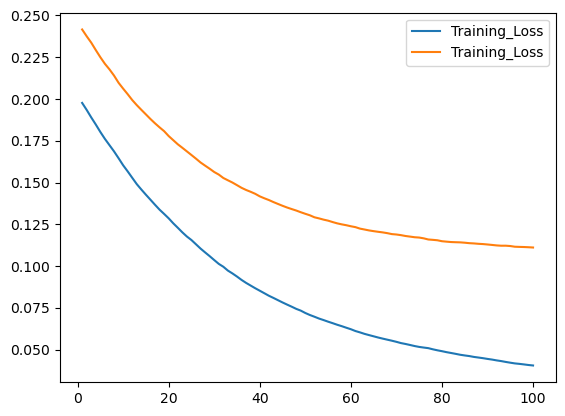

In [21]:
#Range--no of epochs
plt.plot(range(1,101),history.history['loss'],label='Training_Loss')
plt.plot(range(1,101),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

**From plot we can see there is overfitting issue, so we will use dropout to overcome overfit issue**

**Using Dropout ==0.1, 1% of neurons will be dropp**

In [23]:
model1 = Sequential()

model1.add(InputLayer(shape=(2,)))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=16,activation='relu'))
model1.add(Dense(units=8,activation='relu'))

model1.add(Dropout(rate=0.1))

model1.add(Dense(units=1,activation='sigmoid'))

In [25]:
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model1.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.5083 - loss: 0.7685 - val_accuracy: 0.4889 - val_loss: 0.7648
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4983 - loss: 0.7606 - val_accuracy: 0.4889 - val_loss: 0.7498
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5438 - loss: 0.7366 - val_accuracy: 0.4889 - val_loss: 0.7364
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5355 - loss: 0.7240 - val_accuracy: 0.4889 - val_loss: 0.7228
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5306 - loss: 0.7104 - val_accuracy: 0.4889 - val_loss: 0.7102
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5487 - loss: 0.6976 - val_accuracy: 0.4889 - val_loss: 0.7046
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5248 - loss: 0.6937 - val_accuracy: 0.4889 - val_loss: 0.6972
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5554 - loss: 0.6801 - val_accuracy: 0.4889 - val_loss

Epoch 52/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9537 - loss: 0.4280 - val_accuracy: 0.9333 - val_loss: 0.4547
Epoch 53/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9653 - loss: 0.4197 - val_accuracy: 0.9333 - val_loss: 0.4502
Epoch 54/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9578 - loss: 0.4190 - val_accuracy: 0.9333 - val_loss: 0.4460
Epoch 55/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9628 - loss: 0.4120 - val_accuracy: 0.9333 - val_loss: 0.4408
Epoch 56/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9851 - loss: 0.4060 - val_accuracy: 0.9333 - val_loss: 0.4367
Epoch 57/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9727 - loss: 0.3977 - val_accuracy: 0.9556 - val_loss: 0.4320
Epoch 58/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9802 - loss: 0.3950 - val_accuracy: 0.9556 - val_loss: 0.4278
Epoch 59/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9570 - loss: 0.3896 - val_accuracy: 0.9556 - v

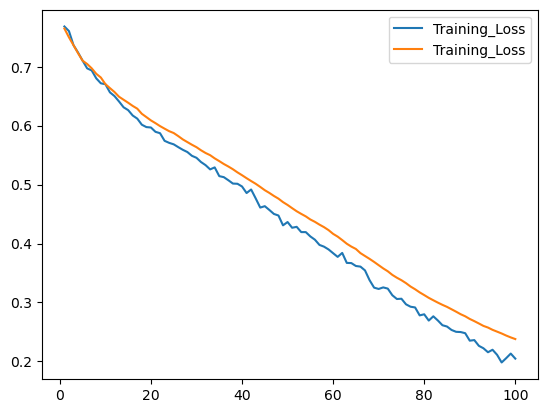

In [27]:
#Range--no of epochs
plt.plot(range(1,101),history.history['loss'],label='Training_Loss')
plt.plot(range(1,101),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

**Conc:- Overfitting reduced as compare to previous**

* **Interview ques:- Why we are getting spiky curve of blue**
* **Ans:- Because we are working on very small amount of data**

**Using Dropout ==0.4, 40% of neurons will be dropp**

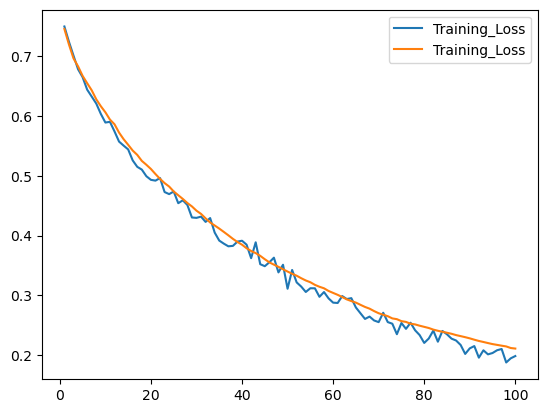

In [28]:
model1 = Sequential()

model1.add(InputLayer(shape=(2,)))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=16,activation='relu'))
model1.add(Dense(units=8,activation='relu'))

model1.add(Dropout(rate=0.4))

model1.add(Dense(units=1,activation='sigmoid'))




model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


history = model1.fit(X_traincv, y_traincv, batch_size=400, epochs=100, validation_data=(X_testcv, y_testcv), verbose=0)


#Range--no of epochs
plt.plot(range(1,101),history.history['loss'],label='Training_Loss')
plt.plot(range(1,101),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

**Using Dropout ==0.5, 50 of neurons will be dropp**

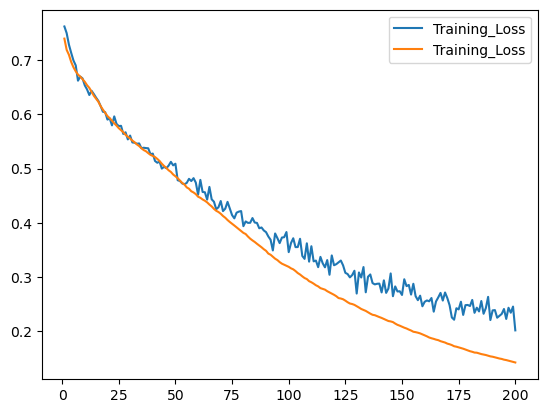

In [32]:
model1 = Sequential()

model1.add(InputLayer(shape=(2,)))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=16,activation='relu'))
model1.add(Dense(units=8,activation='relu'))

model1.add(Dropout(rate=0.5))

model1.add(Dense(units=1,activation='sigmoid'))




model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


history = model1.fit(X_traincv, y_traincv, batch_size=400, epochs=200, validation_data=(X_testcv, y_testcv), verbose=0)



plt.plot(range(1,201),history.history['loss'],label='Training_Loss')
plt.plot(range(1,201),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

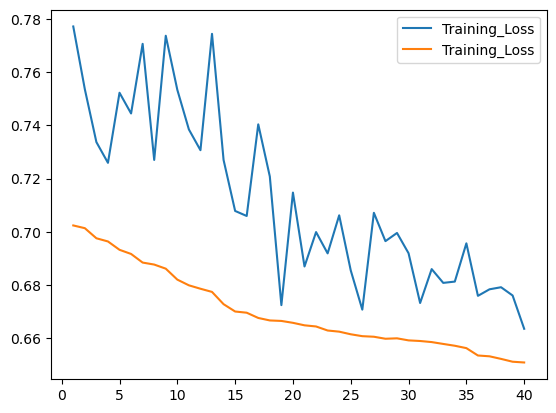

In [36]:
model1 = Sequential()

model1.add(InputLayer(shape=(2,)))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(units=8,activation='relu'))

model1.add(Dropout(rate=0.5))

model1.add(Dense(units=1,activation='sigmoid'))




model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


history = model1.fit(X_traincv, y_traincv, batch_size=400, epochs=40, validation_data=(X_testcv, y_testcv), verbose=0)



plt.plot(range(1,41),history.history['loss'],label='Training_Loss')
plt.plot(range(1,41),history.history['val_loss'],label='Training_Loss')

plt.legend()
plt.show()

**`Dropout Usage Considerations`**
* **Dropout in Multiple Layers:**

* **Pros:**
Helps to regularize the model more effectively by ensuring that no single neuron or set of neurons is overly relied upon.
Can improve generalization by making the network more robust.
* **Cons:**
Adding dropout to many layers can slow down training because the network has to learn more redundant representations.
If overused, dropout can lead to underfitting, where the model becomes too simplistic and fails to capture important patterns in the data.

* **Dropout in One Layer:**

* **Pros:**
Easier to manage and tune. By focusing dropout on one or a few critical layers, you can achieve a balance between regularization and training efficiency.
Often sufficient to regularize the network effectively, especially if placed after the layer(s) with the highest capacity (e.g., the layer with the most units).
* **Cons:**
May not provide enough regularization if the network is very deep or complex, as neurons in other layers might still overfit.


* **Best Practices for Dropout**
* **Start Simple:** Begin with dropout in one or two layers, typically those with the highest number of units or the most critical layers in your architecture.For example, adding dropout to the last few dense layers in a deep network.

* **Gradual Adjustment:** Experiment with different dropout rates and layers incrementally. Assess the model's performance and adjust accordingly. Common dropout rates are 0.2 to 0.5, but this can vary based on your specific use case.

* **Monitor Performance:** Use validation data to monitor the model's performance during training. If you notice signs of overfitting, consider adding or increasing dropout. If you see underfitting, reduce dropout or remove it from some layers.

* **Production Considerations:** In production, ensure that dropout layers are appropriately handled. During inference, dropout should not be applied. Frameworks like Keras handle this automatically, but it’s essential to verify that the model is correctly exported and used.